In [53]:
#importing packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
%matplotlib inline 
#to plot in jupyter
pd.options.mode.chained_assignment=None
import seaborn as sns
from scipy import stats

In [227]:
df=pd.read_csv('dataset/clean_df.csv')    #no null dataframe

In [229]:
df.head()

,Unnamed: 0,Ex-Showroom_Price(Rs),Displacement(cc),Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity(litres),Height(mm),Length(mm),Width(mm),Doors,...,Seat_Height_Adjustment_Electric Adjustment with Memory,Seat_Height_Adjustment_Manual Adjustment,Seat_Height_Adjustment_NA,Seat_Height_Adjustment_Semi Automatic Adjustment,Rear_Center_Armrest_Audio Controls,"Rear_Center_Armrest_Audio Controls, Cup Holders",Rear_Center_Armrest_Cup Holders,"Rear_Center_Armrest_Cup Holders, Audio Controls",Rear_Center_Armrest_NA,Rear_Center_Armrest_TRUE
0,0,292667,0.069688,0.0,0.066667,0.1,0.618463,0.519003,0.785986,1.000000,...,0,0,1,0,0,0,0,0,1,0
1,1,236447,0.069688,0.0,0.066667,0.1,0.618463,0.519003,0.785986,1.000000,...,0,0,1,0,0,0,0,0,1,0
2,2,296661,0.069688,0.0,0.066667,0.0,0.618463,0.519003,0.785986,0.666667,...,0,0,1,0,0,0,0,0,1,0
3,3,334768,0.069688,0.0,0.066667,0.1,0.618463,0.519003,0.785986,1.000000,...,0,0,1,0,0,0,0,0,1,0
4,4,272223,0.069688,0.0,0.066667,0.1,0.618463,0.519003,0.785986,1.000000,...,0,0,1,0,0,0,0,0,1,0


In [230]:
# Model Development
# A model or estimator can be thought of as a mathematical equation used to predict a
# value given one or more other values.
# Relating one or more independent variables or features to dependent variables.

In [231]:
lm=LinearRegression()

In [232]:
# Simple Linear Regression

In [233]:
# independent columns
x = df[['Cylinders']]
# dependent columns
y = df['Ex-Showroom_Price(Rs)']

In [234]:
lm.fit(x,y)

LinearRegression()

In [235]:
y_pred=lm.predict(x)

In [236]:
print("Predicted_Ex-Showroom_Price = ",lm.coef_,"*Cylinders + ",lm.intercept_)

Predicted_Ex-Showroom_Price =  [85787702.1692428] *Cylinders +  -9872693.339673558


<AxesSubplot:ylabel='Density'>

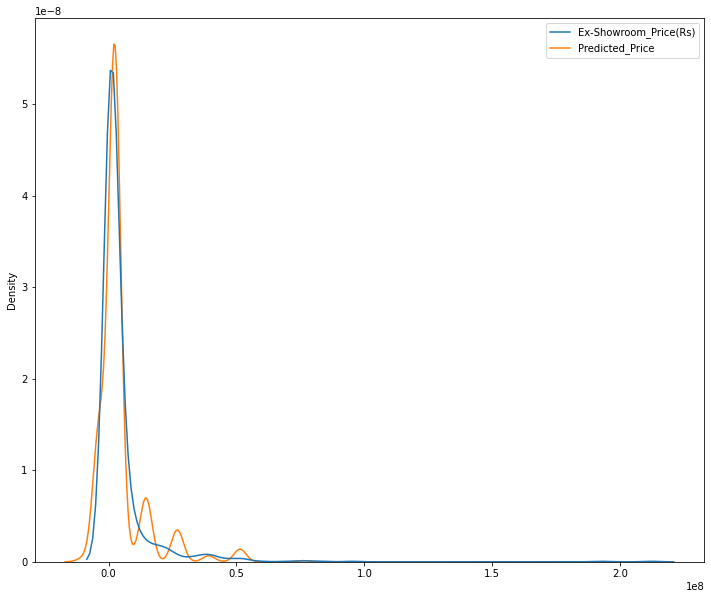

In [237]:
width = 12
height = 10
plt.figure(figsize=(width, height))

xdf=y.to_frame()
xdf['Predicted_Price']=list(y_pred)
sns.kdeplot(data=xdf)

In [238]:
# Find the R^2
print('The R-square is: ', lm.score(x, y))

The R-square is:  0.6674908628519802


In [239]:
# Find RMSE
print('The RMSE is: ',np.sqrt(metrics.mean_squared_error(y,y_pred)))

The RMSE is:  7001852.905250838


In [240]:
# Residual plot
# We expect to see the results to have zero mean.
# Distributed evenly around the x axis with similar variance; there is no curvature.
# This type of residual plot suggests a linear plot is appropriate.

<AxesSubplot:xlabel='Cylinders', ylabel='Ex-Showroom_Price(Rs)'>

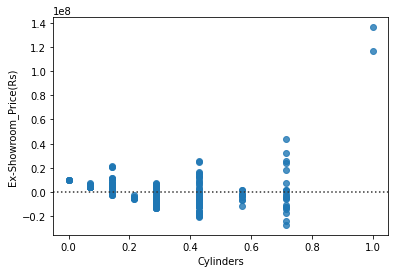

In [241]:
sns.residplot(x=df[['Cylinders']],y=df['Ex-Showroom_Price(Rs)'])

In [242]:
#model evaluation

In [243]:
# Generalization error is a measure of how well our data does at predicting previously unseen data.
# we use cross validation 

In [244]:
scores=cross_val_score(lm,x,y,cv=3)
print(np.mean(scores))

0.27442051401829487


In [245]:
# Multiple Linear Regression

In [246]:
# independent columns
# choosing Z based on pearson coefficient and p-values
x = df[['Displacement(cc)','Cylinders','Fuel_Tank_Capacity(litres)','Wheelbase','Highway_Mileage(km/litre)'
    ,'Seating_Capacity','Number_of_Airbags','Hill_Assist','ESP_(Electronic_Stability_Program)',
    'Rain_Sensing_Wipers','Leather_Wrapped_Steering','Automatic_Headlamps','ASR_Traction_Control'
    ,'Cruise_Control']]
# dependent columns
y = df['Ex-Showroom_Price(Rs)']

In [247]:
lm.fit(x,y)
y_pred = lm.predict(x)

In [248]:
# A distribution plot counts the predicted value versus the actual value.
# These plots are extremely useful for visualizing models with more than one independent variable

<AxesSubplot:ylabel='Density'>

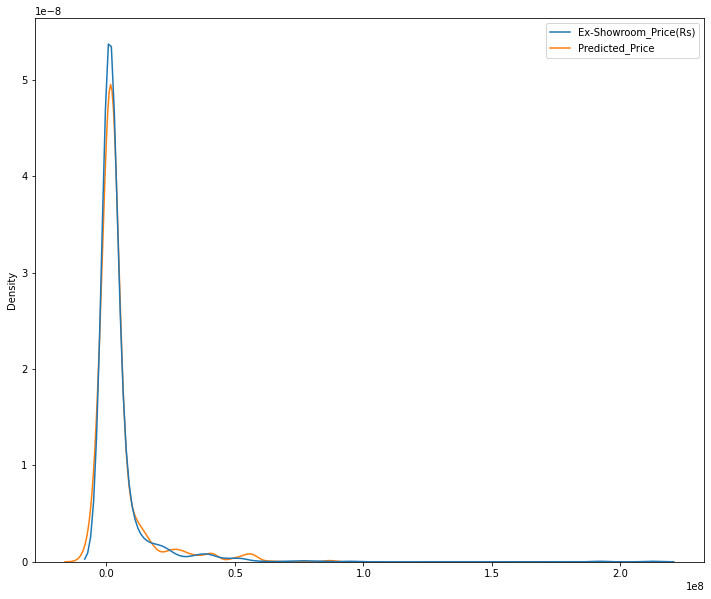

In [249]:
width = 12
height = 10
plt.figure(figsize=(width, height))

xdf=y.to_frame()
xdf['Predicted_Price']=list(y_pred)
sns.kdeplot(data=xdf)

In [250]:
print("Predicted_Ex-Showroom_Price=")
coef=list(lm.coef_)
for index,i in enumerate(x):
    print(coef[index],"*",i,"+")
print(lm.intercept_)

Predicted_Ex-Showroom_Price=
50569436.56851162 * Displacement(cc) +
48896871.044031724 * Cylinders +
-16304151.983656678 * Fuel_Tank_Capacity(litres) +
5297980.950824271 * Wheelbase +
3151682.0495599224 * Highway_Mileage(km/litre) +
-11227635.007667225 * Seating_Capacity +
-2119828.430663695 * Number_of_Airbags +
411160.7082729021 * Hill_Assist +
123906.3657209616 * ESP_(Electronic_Stability_Program) +
-160770.52286159637 * Rain_Sensing_Wipers +
-89571.31846882771 * Leather_Wrapped_Steering +
271382.5397804657 * Automatic_Headlamps +
-736238.9880168813 * ASR_Traction_Control +
153882.4617545325 * Cruise_Control +
-9282807.219279345


In [251]:
# Find the R^2
print('The R-square is: ', lm.score(x, y))

The R-square is:  0.7286047663469002


In [252]:
# Find RMSE
print('The RMSE is: ',np.sqrt(metrics.mean_squared_error(y,y_pred)))

The RMSE is:  6325754.00277305


In [253]:
# Model Evaluation using cross validation 

In [254]:
scores=cross_val_score(lm,x,y,cv=3)
print(np.mean(scores))

0.3812579535525024


In [255]:
nndf=pd.read_csv('dataset/no_null_df.csv')#non normalized dataframe
x_float_cols=['Displacement(cc)','Cylinders','Fuel_Tank_Capacity(litres)','Wheelbase','Highway_Mileage(km/litre)','Seating_Capacity','Number_of_Airbags']
x_float=df[x_float_cols]
def normalize(input):
    for index,c in enumerate(x_float_cols):
        input[index]=(input[index]-nndf[c].min())/(nndf[c].max()-nndf[c].min())
    return input


In [256]:
#sample prediction
new_input = [1850,4,52,2630,20,5,2,True,True,True,True,True,True,True]
float_input = new_input[0:7]
normalized_input=normalize(new_input)
pred=lm.predict([normalized_input])
print(pred)

[4203977.8312192]


c:\Users\devik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [257]:
#polynomial regression and pipeline

In [258]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)

In [259]:
x = x.astype(float)
pipe.fit(x,y)
y_pred=pipe.predict(x)

<AxesSubplot:ylabel='Density'>

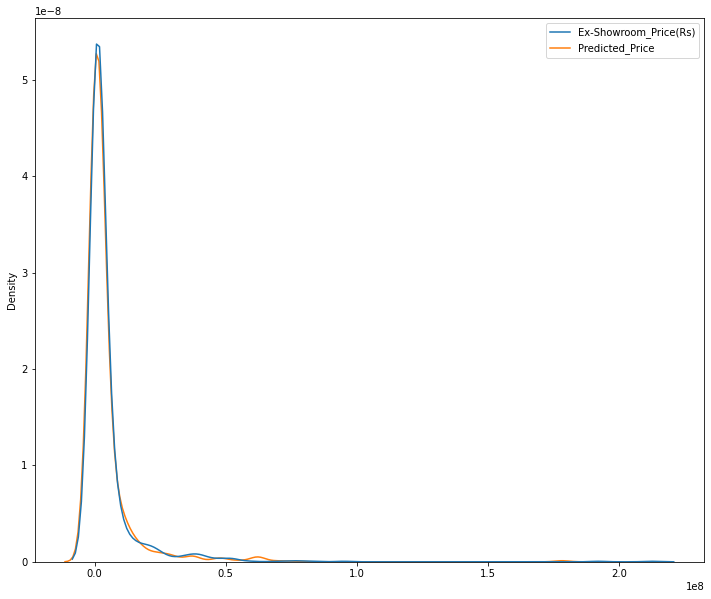

In [260]:
width = 12
height = 10
plt.figure(figsize=(width, height))

xdf=y.to_frame()
xdf['Predicted_Price']=list(y_pred)
sns.kdeplot(data=xdf)

In [261]:
from sklearn.metrics import r2_score

In [262]:
#R^2
print('The R-square value is: ', r2_score(y,y_pred))

The R-square value is:  0.9192661078925861


In [263]:
# Find RMSE
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

3450159.2061067466


In [264]:
# Model Evaluation using cross Validation
scores=cross_val_score(pipe,x,y,cv=3)
print(np.mean(scores))

-0.498544269391118


In [265]:
#sample prediction
new_input = [1850,4,52,2630,20,5,2,True,True,True,True,True,True,True]
float_input = new_input[0:7]
normalized_input=normalize(new_input)
pred=pipe.predict([normalized_input])
print(pred)

[1580032.]


c:\Users\devik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [266]:
# Ridge Regression with Grid Search
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)


In [267]:
Grid1.fit(x_train, y_train)


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [268]:
BestRR=Grid1.best_estimator_

In [269]:
y_pred=BestRR.predict(x)

<AxesSubplot:ylabel='Density'>

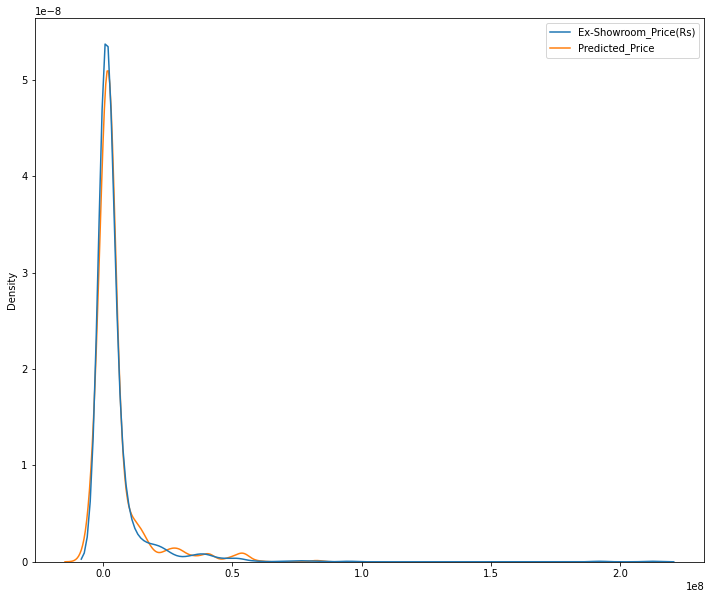

In [270]:
width = 12
height = 10
plt.figure(figsize=(width, height))

xdf=y.to_frame()
xdf['Predicted_Price']=list(y_pred)
sns.kdeplot(data=xdf)

In [271]:
#R^2
print('The R-square value is: ', r2_score(y,y_pred))

The R-square value is:  0.7266988828425486


In [272]:
#RMSE
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

6347926.5697799055


In [273]:
BestRR.score(x_test, y_test)

0.7905257069098777

In [274]:
print("Predicted_Ex-Showroom_Price=")
coef=list(BestRR.coef_)
for index,i in enumerate(x):
    print(coef[index],"*",i,"+")
print(lm.intercept_)

Predicted_Ex-Showroom_Price=
48766141.764265314 * Displacement(cc) +
45053714.16945372 * Cylinders +
-12568246.371072449 * Fuel_Tank_Capacity(litres) +
2309966.9663325003 * Wheelbase +
2466700.1996296914 * Highway_Mileage(km/litre) +
-12044827.205297925 * Seating_Capacity +
-1726053.9810512986 * Number_of_Airbags +
585396.5933413176 * Hill_Assist +
66509.93216008507 * ESP_(Electronic_Stability_Program) +
-26784.594220304745 * Rain_Sensing_Wipers +
-444931.2413762647 * Leather_Wrapped_Steering +
401664.1963430829 * Automatic_Headlamps +
-769256.4292833651 * ASR_Traction_Control +
241621.73575622024 * Cruise_Control +
-9282807.219279345


In [275]:
scores=cross_val_score(BestRR,x,y,cv=3)
print(np.mean(scores))

0.4486946004078103


In [276]:
#sample prediction
new_input = [1850,4,52,2630,20,5,2,True,True,True,True,True,True,True]
float_input = new_input[0:7]
normalized_input=normalize(new_input)
pred=BestRR.predict([normalized_input])
print(pred)

[4330446.49098855]


c:\Users\devik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [277]:
# Simple Linear model
r2=0.6674908628519802
rmse=7001852.905250838
cvs=0.27442051401829487

# Multiple Linear Regression
r2= 0.7286047663469002
rmse=6325754.00277305
cvs=0.3812579535525024

#polynomial regression and pipeline
r2=0.9195692736898278
rmse=3450159.2061067466
cvs=-0.498544269391118

#Ridge Regression
r2=0.7266988828425486
rmse=6347926.5697799055
cvs=0.4486946004078103

# since Ridge Regression has a decent R-squared and RMSE and the best cross validation score we use Ridge Regression for Price Prediction